In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import spotify
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
print(client_id)

0b000639feae45cf9c7f93d5b057f512


In [4]:
client_credential_manager = SpotifyClientCredentials(client_id=os.getenv("CLIENT_ID"), client_secret=os.getenv("CLIENT_SECRET")) 

sp = spotipy.Spotify(client_credentials_manager=client_credential_manager)

In [64]:
response = sp.artist_top_tracks("2YZyLoL8N0Wb9xBt1NhZWg")
popularities = []
times = []
if response:
  df= pd.DataFrame(columns = ['name', 'popularity', 'time'])
  tracks = response["tracks"]
  for track in tracks:
    name=track['name']
    popu=track['popularity']
    time=int(track['duration_ms'])/(1000*60)
    popularities.append(popu)
    times.append(time)
    df=pd.concat([df,pd.DataFrame({'name':name,'popularity':popu,'time':round(time,2)}, index = [0])], ignore_index = True)

df

C:\Users\macar\AppData\Local\Temp\ipykernel_26468\1824920261.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df=pd.concat([df,pd.DataFrame({'name':name,'popularity':popu,'time':round(time,2)}, index = [0])], ignore_index = True)


,name,popularity,time
0,Not Like Us,96,4.57
1,Like That,89,4.46
2,All The Stars (with SZA),86,3.87
3,euphoria,86,6.39
4,Money Trees,79,6.45
5,HUMBLE.,85,2.95
6,PRIDE.,83,4.59
7,LOVE. FEAT. ZACARI.,82,3.56
8,family ties (with Kendrick Lamar),81,4.20
9,Alright,80,3.66


In [54]:
df_popu = df.sort_values('popularity')
df_popu.head(3)

,name,popularity,time
4,Money Trees,79,6.45
9,Alright,80,3.66
8,family ties (with Kendrick Lamar),81,4.20


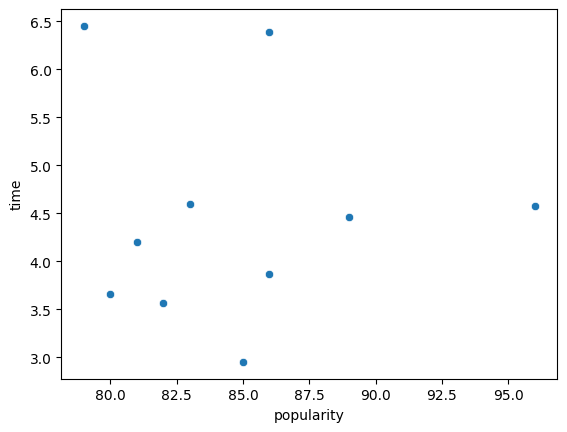

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

scatter_plot = sns.scatterplot(data = df_popu, x = "popularity", y = "time")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

In [79]:
import numpy as np
arr_popu = np.array(popularities)
arr_time = np.array(times)

corr = np.corrcoef(arr_popu,arr_time)
print(round(corr[0,1],3))

-0.035


Obsevando el scatterplot, podemos decir que no se observa una clara evidencia de qué a más duración de la canción más popularidad esta tendrá, ya qué vemos puntos muy dispersos entre si, sin una clara dirección. De hecho, si hacemos la correlación entro tiempo y popularidad, podemos observar que es -0.03, lo cuál refuerza la idea de qué no hay una relación positiva entre tiempo y popularidad.